# LOAD DATA

In [4]:
import os
print(dir)
def list_files_in_directory(directory_path):
    """List all files in the given directory."""
    try:
        files = os.listdir(directory_path)
        return [f for f in files if os.path.isfile(os.path.join(directory_path, f))]
    except FileNotFoundError:
        return f"Error: The directory '{directory_path}' does not exist."
    except PermissionError:
        return f"Error: Permission denied to access '{directory_path}'."
    
data = list_files_in_directory("../data-csv")
print(data)

<built-in function dir>
['costumer-churn.csv']


In [ ]:
import pandas as pd 
import numpy as np  


pdData = pd.read_csv("../data-csv/costumer-churn.csv")
print("read complete")

read complete


In [9]:
pdData.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
pdData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
pdData.info()


pdData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

# DATA PRE-PROCESSING

HANDLE CATEGORICAL DATA
Remove duplicates
Fix obvious invalid rows
Standardize column names
Convert datatypes (string → numeric/date)

In [12]:
pdData["gender"].isnull().sum()

np.int64(0)

In [13]:
pdData["gender"] = pdData["gender"].map({"Male": 0, "Female":1})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
pdData["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
pdData["Partner"] = pdData["Partner"].map({"Yes": 0, "No":1})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
pdData["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
pdData["Dependents"].isnull().sum()

np.int64(0)

In [18]:
pdData["Dependents"] = pdData["Dependents"].map({"No": 0, "Yes":1})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
pdData["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [20]:
pdData["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
pdData["PhoneService"].isnull().sum()

np.int64(0)

In [22]:
pdData["PhoneService"] = pdData["PhoneService"].map({"No": 0, "Yes":1})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
pdData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
pdData["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [26]:
pdData["MultipleLines"] = pdData["MultipleLines"].map({ "No phone service":0 , "No":1, "Yes":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
pdData["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [28]:
pdData["InternetService"] = pdData["InternetService"].map({ "DSL":0 , "Fibre optic":1, "No":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   3947 non-null   float64
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
pdData["OnlineSecurity"].unique()

array([0, 1, 2])

In [31]:
pdData["OnlineSecurity"] = pdData["OnlineSecurity"].map({ "No":0 , "Yes":1, "No internet service":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
pdData["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [35]:
pdData["OnlineBackup"] = pdData["OnlineBackup"].map({ "Yes":0 , "No":1, "No internet service":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  PaymentMethod     7043 non-null   object 
 18  MonthlyCharges    7043 non-null   float64
 19  TotalCharges      7043 non-null   object 
 20  Churn             7043 non-null   object 

In [36]:
pdData["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [37]:
pdData["DeviceProtection"] = pdData["DeviceProtection"].map({ "No":0 , "Yes":1, "No internet service":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,1,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,0,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,1,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
pdData["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [39]:
pdData["TechSupport"] = pdData["TechSupport"].map({ "No":0 , "Yes":1, "No internet service":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,0,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,1,0,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,0,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,1,1,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   3947 non-null   float64
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
pdData["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [42]:
pdData["StreamingTV"] = pdData["StreamingTV"].map({ "No":0 , "Yes":1, "No internet service":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,0,0,0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,1,0,0,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,0,0,0,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,1,1,0,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,0,0,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
pdData["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [44]:
pdData["StreamingMovies"] = pdData["StreamingMovies"].map({ "No":0 , "Yes":1, "No internet service":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
pdData["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [46]:
pdData["Contract"] = pdData["Contract"].map({ "Month-to-month":0 , "One year":1, "Two year":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,0,0,0,0,0,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,1,0,0,0,1,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,0,0,0,0,0,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,1,1,0,0,1,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,0,0,0,0,Yes,Electronic check,70.70,151.65,Yes


In [47]:
pdData["PaperlessBilling"].head()

0    Yes
1     No
2    Yes
3     No
4    Yes
Name: PaperlessBilling, dtype: object

In [48]:
pdData["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [49]:
pdData["PaperlessBilling"] = pdData["PaperlessBilling"].map({ "Yes":0 , "No":1})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,0,0,0,0,0,0,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,1,0,0,0,1,1,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,0,0,0,0,0,0,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,1,1,0,0,1,1,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,0,0,0,0,0,Electronic check,70.70,151.65,Yes


In [50]:
pdData["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
pdData["PaymentMethod"] = pdData["PaymentMethod"].map({ "Electronic check":0 , "Mailed check":1, "Bank transfer (automatic)":2, "Credit card (automatic)":3 })
pdData.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,0,0,0,0,0,0,NaN,29.85,29.85,No
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,1,0,0,0,1,1,NaN,56.95,1889.5,No
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,0,0,0,0,0,0,NaN,53.85,108.15,Yes
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,1,1,0,0,1,1,NaN,42.30,1840.75,No
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,0,0,0,0,0,NaN,70.70,151.65,Yes


In [57]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   3947 non-null   float64
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
pdData["TotalCharges"].h

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [60]:
pdData["Churn"].unique()


array(['No', 'Yes'], dtype=object)

In [61]:
pdData["Churn"] = pdData["Churn"].map({ "No":0 , "Yes":1 }) 
pdData.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,0,0,0,0,0,0,NaN,29.85,29.85,0
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,1,0,0,0,1,1,NaN,56.95,1889.5,0
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,0,0,0,0,0,0,NaN,53.85,108.15,1
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,1,1,0,0,1,1,NaN,42.30,1840.75,0
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,0,0,0,0,0,NaN,70.70,151.65,1


In [62]:
pdData[pdData["InternetService"].isna()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,0,0,0,0,0,NaN,70.70,151.65,1
5,9305-CDSKC,1,0,1,0,8,1,2,NaN,0,...,1,0,1,1,0,0,NaN,99.65,820.5,1
6,1452-KIOVK,0,0,1,1,22,1,2,NaN,0,...,0,0,1,0,0,0,NaN,89.10,1949.4,0
8,7892-POOKP,1,0,0,0,28,1,2,NaN,0,...,1,1,1,1,0,0,NaN,104.80,3046.05,1
12,8091-TTVAX,0,0,0,0,58,1,2,NaN,0,...,1,0,1,1,1,1,NaN,100.35,5681.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,0639-TSIQW,1,0,1,0,67,1,2,NaN,1,...,1,0,1,0,0,0,NaN,102.95,6886.25,1
7035,8456-QDAVC,0,0,1,0,19,1,1,NaN,0,...,0,0,1,0,0,0,NaN,78.70,1495.1,0
7039,2234-XADUH,1,0,0,1,72,1,2,NaN,0,...,1,0,1,1,1,0,NaN,103.20,7362.9,0
7041,8361-LTMKD,0,1,0,0,4,1,2,NaN,0,...,0,0,0,0,0,0,NaN,74.40,306.6,1


In [64]:
pdData.to_csv("Telco_Cleaned.csv", index=False)


# RESTORE THE ORIGINAL DATA IN THE CLEANED SET

In [65]:
backUpData = pdData
print("Backup complete")

Backup complete


In [67]:
originalcsv = pd.read_csv("../data-csv/costumer-churn.csv")

In [68]:
pdData["PaymentMethod"] = originalcsv["PaymentMethod"]

In [69]:
pdData["PaymentMethod"].head(15)

0              Electronic check
1                  Mailed check
2                  Mailed check
3     Bank transfer (automatic)
4              Electronic check
5              Electronic check
6       Credit card (automatic)
7                  Mailed check
8              Electronic check
9     Bank transfer (automatic)
10                 Mailed check
11      Credit card (automatic)
12      Credit card (automatic)
13    Bank transfer (automatic)
14             Electronic check
Name: PaymentMethod, dtype: object

In [70]:
pdData["PaymentMethod"] = pdData["PaymentMethod"].map({ "Electronic check":0 , "Mailed check":1, "Bank transfer (automatic)":2, "Credit card (automatic)":3 })
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0.0,0,...,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,0,0,1,0,34,1,1,0.0,1,...,1,0,0,0,1,1,1,56.95,1889.5,0
2,3668-QPYBK,0,0,1,0,2,1,1,0.0,1,...,0,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,0,0,1,0,45,0,0,0.0,1,...,1,1,0,0,1,1,2,42.30,1840.75,0
4,9237-HQITU,1,0,1,0,2,1,1,NaN,0,...,0,0,0,0,0,0,0,70.70,151.65,1


In [71]:
pdData["InternetService"] = originalcsv["InternetService"]

In [72]:
pdData["InternetService"].head(20)

0             DSL
1             DSL
2             DSL
3             DSL
4     Fiber optic
5     Fiber optic
6     Fiber optic
7             DSL
8     Fiber optic
9             DSL
10            DSL
11             No
12    Fiber optic
13    Fiber optic
14    Fiber optic
15    Fiber optic
16             No
17    Fiber optic
18            DSL
19    Fiber optic
Name: InternetService, dtype: object

In [73]:
pdData["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [74]:
pdData["InternetService"] = pdData["InternetService"].map({ "DSL":0 , "Fiber optic":1, "No":2})
pdData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,0,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1889.5,0
2,3668-QPYBK,0,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,0,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,1840.75,0
4,9237-HQITU,1,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,151.65,1


In [75]:
pdData[pdData.isna().any(axis=1)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [76]:
pdData.to_csv("all_cleaned_up.csv", index=False)


In [77]:
pdData.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.516967,0.299588,32.371149,0.903166,1.325004,0.872923,0.720006,0.871788,0.777226,0.723555,0.817691,0.821241,0.690473,0.407781,1.315633,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.737796,0.796885,0.738369,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


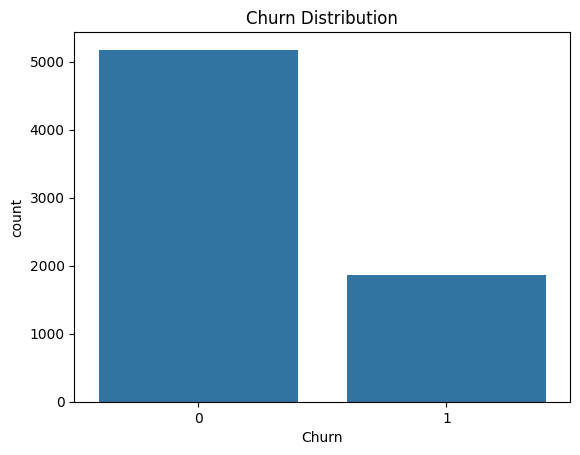

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=pdData) # where 0= No   , 1= Yes
plt.title("Churn Distribution")
plt.show()


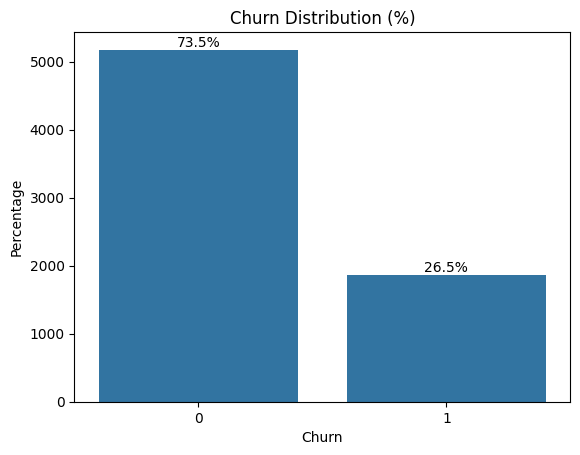

In [79]:

ax = sns.countplot(x="Churn", data=pdData)
plt.title("Churn Distribution (%)")

# Total number of observations
total = len(pdData)

# Add percentage labels
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()


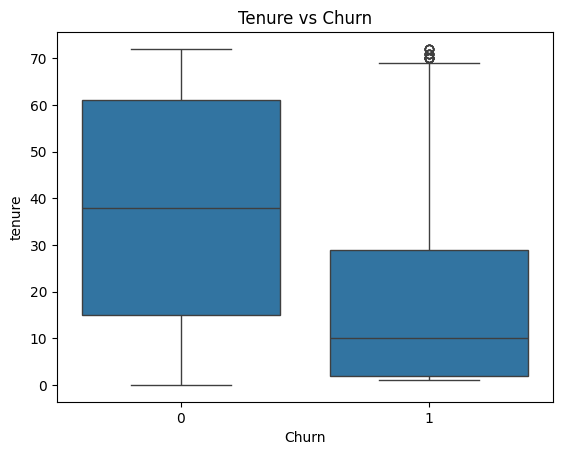

In [80]:
sns.boxplot(x="Churn", y="tenure", data=pdData)
plt.title("Tenure vs Churn")
plt.show()

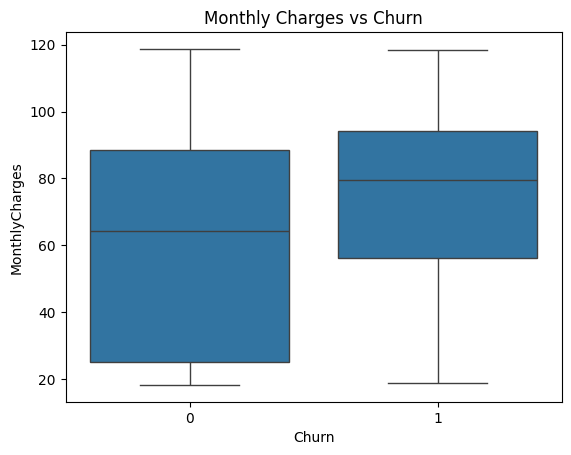

In [81]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=pdData)
plt.title("Monthly Charges vs Churn")
plt.show()


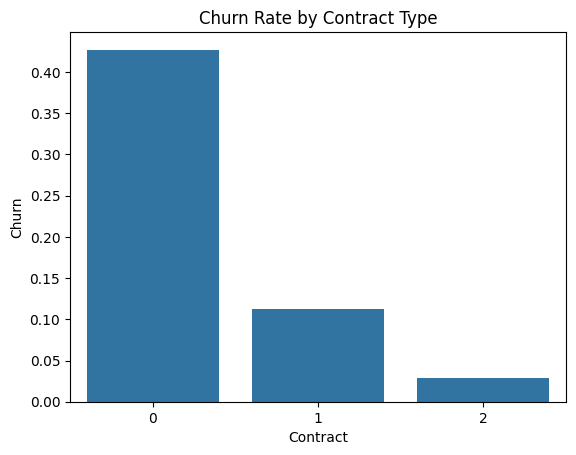

In [82]:
churn_by_contract = (
    pdData.groupby("Contract")["Churn"]
    .mean()
    .reset_index()
)

sns.barplot(x="Contract", y="Churn", data=churn_by_contract)
plt.title("Churn Rate by Contract Type")
plt.show()


C:\Users\ASHU\AppData\Local\Temp\ipykernel_20252\2292385360.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pdData.groupby(["Contract", "TenureBucket", "Churn"])
C:\Users\ASHU\AppData\Local\Temp\ipykernel_20252\2292385360.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_pct.groupby(["Contract", "TenureBucket"])["Count"]
C:\Users\ASHU\AppData\Local\Temp\ipykernel_20252\2292385360.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


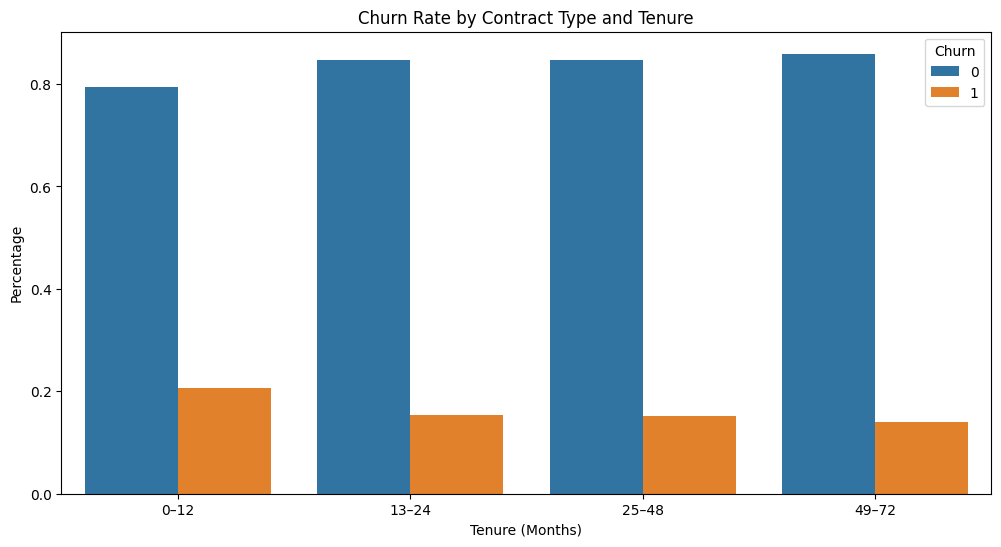

In [83]:
pdData["TenureBucket"] = pd.cut(
    pdData["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0–12", "13–24", "25–48", "49–72"]
)

churn_pct = (
    pdData.groupby(["Contract", "TenureBucket", "Churn"])
    .size()
    .reset_index(name="Count")
)

churn_pct["Percentage"] = (
    churn_pct.groupby(["Contract", "TenureBucket"])["Count"]
    .transform(lambda x: x / x.sum())
)
 

plt.figure(figsize=(12, 6))

sns.barplot(
    data=churn_pct,
    x="TenureBucket",
    y="Percentage",
    hue="Churn",
    ci=None
)

plt.title("Churn Rate by Contract Type and Tenure")
plt.ylabel("Percentage")
plt.xlabel("Tenure (Months)")
plt.legend(title="Churn")
plt.show()




In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
backUpDatav2 = pdData
print("most recent backup done")

most recent backup done


In [85]:
X = pdData.drop(columns=["Churn", "customerID" ])
y = pdData["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  
)

In [92]:

X_test = X_test.drop(columns=["TenureBucket" ])


In [93]:
X_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
437,0,0,0,1,72,1,2,1,1,0,1,1,1,1,2,0,3,114.05,8468.2
2280,1,1,1,0,8,1,2,1,0,1,0,1,1,1,0,0,3,100.15,908.55


In [94]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

model1 = LogisticRegression(class_weight="balanced")
model2 = RandomForestClassifier(class_weight="balanced")
model3 = xgb.XGBClassifier(scale_pos_weight=2.33)

voting_clf = VotingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('xgb', model3)],
    voting='soft'  # probabilities combined
)
voting_clf.fit(X_train, y_train)


ValueError: could not convert string to float: ' '

In [95]:
backUpDatav2.shape

(7043, 22)

In [113]:
# Required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression  
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# -------------------------------
# Define individual models
# -------------------------------
 
# Apply SMOTE on training set only

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_res).value_counts())

# Define models

lr_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    scale_pos_weight=1,  # SMOTE already balances classes
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

voting_clf = VotingClassifier(
    estimators=[('lr', lr_model), ('rf', rf_model), ('xgb', xgb_model)],
    voting='soft'
)

# Fit model on resampled data

voting_clf.fit(X_train_res, y_train_res)

# Evaluate on original test set
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

ImportError: cannot import name '_is_pandas_df' from 'sklearn.utils.validation' (c:\Users\ASHU\anaconda3\envs\churnenv\Lib\site-packages\sklearn\utils\validation.py)

In [115]:
 
import sklearn

 
print(sklearn.__version__)   # 1.8.0


1.8.0


In [97]:
pdData.dtypes


customerID            object
gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService        int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract               int64
PaperlessBilling       int64
PaymentMethod          int64
MonthlyCharges       float64
TotalCharges          object
Churn                  int64
TenureBucket        category
dtype: object

In [98]:
pdData.drop(columns=["TenureBucket"])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,0,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1889.5,0
2,3668-QPYBK,0,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,0,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,1840.75,0
4,9237-HQITU,1,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,0,1,24,1,2,0,1,...,1,1,1,1,1,0,1,84.80,1990.5,0
7039,2234-XADUH,1,0,0,1,72,1,2,1,0,...,1,0,1,1,1,0,3,103.20,7362.9,0
7040,4801-JZAZL,1,0,0,1,11,0,0,0,1,...,0,0,0,0,0,0,0,29.60,346.45,0
7041,8361-LTMKD,0,1,0,0,4,1,2,1,0,...,0,0,0,0,0,0,1,74.40,306.6,1


In [102]:
print(X_train['TotalCharges'].dtype)


object


In [103]:
X_train["TotalCharges"].head(50)

3738    1701.65
3151    1151.55
4860     590.35
3867     1905.7
3810      44.55
2666     5196.1
2645       19.8
189      2379.1
5767     3808.2
2257    4847.05
2641     287.85
6950     232.55
3938     123.05
2764     2000.2
3113     3474.2
2986     3842.6
5427     2613.4
328      973.65
11        326.8
4559      130.5
6271     2220.1
6234    1474.35
3741    7732.65
6937      961.4
622     3355.65
6969       20.5
1056      412.5
6491       69.2
2582    1275.65
478       453.4
2935     6045.9
1236      228.4
6321     655.85
2414      507.9
4805    1331.05
785      4874.8
577       597.9
5704     1564.4
1201     611.65
5488     4525.8
3253    3684.95
7004     3691.2
4392       19.2
4453    1037.75
6780      559.2
2564    1425.45
5338     1593.1
3128        122
3887      815.5
4097     6171.2
Name: TotalCharges, dtype: object

In [ ]:
# Convert TotalCharges to numeric
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

print(X_test['TotalCharges'].isna().sum())

# Fill NaNs
X_test['TotalCharges'].fillna(X_test['TotalCharges'].median(), inplace=True)

print(X_test['TotalCharges'].dtype)


3
float64


C:\Users\ASHU\AppData\Local\Temp\ipykernel_20252\731208532.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['TotalCharges'].fillna(X_test['TotalCharges'].median(), inplace=True)
